# Case Study: Predicting Bank Customer Churn Using Deep Learning

In the competitive banking sector, retaining customers is critical for sustaining growth and profitability. Customer churn – the rate at which customers leave a bank – can result in significant revenue loss. This project leverages machine learning and deep learning techniques to predict which clients are at risk of churning, enabling the bank to proactively engage and retain them.

Business Problem
Goal: Develop a predictive model to identify customers likely to churn.

Business Impact:
1. Improve customer retention.
2. Personalize engagement strategies.
3. Reduce revenue loss by retaining high-value customers.


# Dataset Description:
Dataset Name: BankChurners.csv
Entries: 10,127 customers
Features: 23 columns representing customer demographics, engagement, and transaction behavior.
Target Variable:

Attrition_Flag – Indicates if a customer churned or remained.

Key Attributes:

1. Demographics: Customer_Age, Gender, Education_Level, Income_Category
2. Engagement: Months_on_book, Total_Relationship_Count, Contacts_Count_12_mon
3. Financials: Credit_Limit, Total_Trans_Amt, Avg_Utilization_Ratio

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


I will erase the last two columns since they hinter my process in feature selection

In [3]:
df = df[df.columns[:-2]]

Data Preprocessing Data

In [4]:
# Finding Missing Data
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Interpretation of results:
The dataset shows no missing values in any of the columns. This simplifies the preprocessing steps, as there is no need for imputation or filling of missing data.

I will also drop the column CLIENTNUM since it is not useful for my algorithm

Rationale: CLIENTNUM is just an identifier and doesn't influence churn prediction.


In [5]:
df = df.drop(['CLIENTNUM'], axis=1)

In [6]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Strategy Handling the Data
1. Label Encoding the Binary Categorical Values (Where there is a ranking or explicit values)
2. One Hot Encoding (Where there is no ranking of values)

In [7]:
df["Gender"].value_counts()
df['Gender'].unique()


array(['M', 'F'], dtype=object)

In [8]:
# Label Encoding
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1, 'Unknown': 2})
df


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
# Hot Encoding
encode_columns = [col for col in ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] if col in df.columns]
df = pd.get_dummies(df, columns=encode_columns)

In [10]:
df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,0,3,39,5,1,3,12691.0,777,...,False,False,True,False,False,False,True,False,False,False
1,Existing Customer,49,1,5,44,6,1,2,8256.0,864,...,False,False,False,False,True,False,True,False,False,False


Encode Categorical Values:
Convert Attrition_Flag to binary (0: Existing Customer, 1: Churned):

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])

df['Attrition_Flag']


0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

Check if the Data is imbalanced based on the attrition flag 

Why This Matters:
1. Models trained on imbalanced data may become biased towards the majority class (predicting customers will stay), leading to poor performance in identifying churn.

How to Solve the Problem:
1. Oversampling (SMOTE): Generate synthetic samples for the minority class.
2. Undersampling: Randomly remove samples from the majority class.
3. Class Weight Adjustment (During Model Training): Adjust the loss function to penalize the majority class more.

Understanding Class Imbalance:
1. Raw counts (without normalization) only show the absolute number of customers in each class.
2. Normalized counts (percentages) make it easier to see the relative distribution
3. Using value_counts(normalize=True) * 100 provides the percentage distribution of each class, rather than just the raw counts


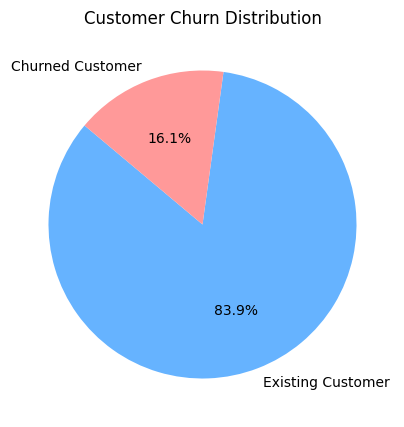

In [12]:
# Visualization of Attrition Flag / Check for imbalanced data

# Calculate class distribution (if not already done)
attrition_flag = df['Attrition_Flag'].value_counts(normalize=True) * 100 # Computes the percentage of each class.

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(attrition_flag, labels=['Existing Customer', 'Churned Customer'], 
        autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Customer Churn Distribution')
plt.show()

Interpretation of Data:

The data shows a significant class imbalance:
1. 83.93% of the data represents class 1 (Existing Customers).
2. 16.07% represents class 0 (Churned Customers).

Why This Matters (Very Important):
Models trained on imbalanced data may become biased towards the majority class (predicting customers will stay), leading to poor performance in identifying churn.

# Correlation Matrix

In [13]:
correlation_matrix = df.corr()
top_10 = correlation_matrix['Attrition_Flag'].abs().sort_values(ascending=False)[1:11]
selected_features = top_10.index.tolist()
selected_features

['Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Revolving_Bal',
 'Contacts_Count_12_mon',
 'Avg_Utilization_Ratio',
 'Total_Trans_Amt',
 'Months_Inactive_12_mon',
 'Total_Relationship_Count',
 'Total_Amt_Chng_Q4_Q1',
 'Gender']

In [14]:
# Display Percentage Correlation
top_10 = top_10 * 100
print("Top 10 Features Correlated with Attrition_Flag (in %):")
print(top_10)

Top 10 Features Correlated with Attrition_Flag (in %):
Total_Trans_Ct              37.140270
Total_Ct_Chng_Q4_Q1         29.005401
Total_Revolving_Bal         26.305288
Contacts_Count_12_mon       20.449051
Avg_Utilization_Ratio       17.841033
Total_Trans_Amt             16.859838
Months_Inactive_12_mon      15.244881
Total_Relationship_Count    15.000523
Total_Amt_Chng_Q4_Q1        13.106285
Gender                       3.727170
Name: Attrition_Flag, dtype: float64


# Scaling the Data

Before Oversampling (SMOTE): Generate synthetic samples for the minority class I will Normalize and Scale Numerical Features. I prefer the standardization process

1. Standardization ensures faster convergence during training and helps the model learn effectively.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])




I have already analyzed the data before and also decided to perform feature engineering
1. Engagement Score: The Engagement Score is a derived feature that measures the overall activity level of a customer

Total_Trans_Amt – The total transaction amount by the customer.

Total_Trans_Ct – The total number of transactions made by the customer.

Why This Matters:
1. High Engagement Score: Indicates frequent and high-value transactions – less likely to churn.
2. Low Engagement Score: Suggests infrequent or low-value transactions – higher risk of churn.

In [16]:
df['Engagement_Score'] = df['Total_Trans_Amt'] * df['Total_Trans_Ct']

Feature Engineering: Inactivity Score

The Inactivity Score is a derived feature that quantifies how inactive or disengaged a customer has been over a period of time. It combines factors that indicate reduced interaction with the bank, which may correlate with a higher likelihood of churn.

1. Months_Inactive_12_mon – Number of months the customer has been inactive in the last 12 months.
2. Contacts_Count_12_mon – Number of times the customer contacted the bank in the last 12 months.

1. Higher Inactivity Score: Suggests the customer has either been inactive for longer or has contacted the bank frequently (possibly indicating dissatisfaction or issues).
2. Lower Inactivity Score: Indicates fewer inactive months and fewer contacts, typically reflecting a satisfied or low-maintenance customer.

Why is this combination feature useful: From Scientific Papers 

1. Churn Indicator: Customers with higher inactivity scores may exhibit churn tendencies.
2. Behavioral Insight: Helps in segmenting customers who are at risk due to inactivity or frequent engagement with customer service (sign of frustration).
3. Retention Strategy: Allows targeting inactive customers with re-engagement offers or promotions.

In [17]:
df['Inactivity_Score'] = df['Months_Inactive_12_mon'] + df['Contacts_Count_12_mon']


In [18]:
df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Engagement_Score,Inactivity_Score
0,1,-0.165406,0,3,39,5,1,3,0.446622,777,...,True,False,False,False,True,False,False,False,-40.307676,4
1,1,0.333570,1,5,44,6,1,2,-0.041367,864,...,False,False,True,False,True,False,False,False,-30.242276,3


# Test & Train Split Section

In [19]:
# Split data
from sklearn.model_selection import train_test_split

X = df.drop('Attrition_Flag', axis=1)

y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
X

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Engagement_Score,Inactivity_Score
0,-0.165406,0,3,39,5,1,3,0.446622,777,11914.0,...,True,False,False,False,True,False,False,False,-40.307676,4
1,0.333570,1,5,44,6,1,2,-0.041367,864,7392.0,...,False,False,True,False,True,False,False,False,-30.242276,3
2,0.583058,0,3,36,4,1,0,-0.573698,0,3418.0,...,False,True,False,False,True,False,False,False,-14.819634,1
3,-0.789126,1,4,34,3,4,1,-0.585251,2517,796.0,...,False,False,True,False,True,False,False,False,-19.035166,5
4,-0.789126,0,3,21,5,1,0,-0.430877,0,4716.0,...,True,False,False,False,True,False,False,False,-29.575377,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,0,2,40,3,2,3,-0.509330,1851,2152.0,...,False,False,False,False,True,False,False,False,381.344885,5
10123,-0.664382,0,2,25,4,2,3,-0.479181,2186,2091.0,...,False,False,False,False,True,False,False,False,88.559745,5
10124,-0.290150,1,1,36,5,3,4,-0.354626,0,5409.0,...,False,False,True,False,True,False,False,False,103.979636,7
10125,-2.036565,0,2,36,4,3,3,-0.368710,0,5281.0,...,False,False,False,False,True,False,False,False,72.840580,6


In [21]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

Compute Class Weights For Data Imbalancing Instead Of Smote

Why: I wanted to try something new to me  :)

# Building the model 

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

In [23]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight

In [24]:
# Ensure the data is numeric before building weights
# Ensure all data is numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [25]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

In [26]:
class_weights

tensor([3.1110, 0.5957])

Interpretation
The class weight results provide insight into how the model compensates for class imbalance during training
1. Class 0 (Churned Customers): Weight = 3.1110
2. Class 1 (Existing Customers): Weight = 0.5957

Higher Weight for Class 0 (Churned Customers):
1. This indicates that the churned customers (minority class) are upweighted by 3.1x. The model penalizes misclassification of churned customers more heavily to ensure better detection of rare cases.

Lower Weight for Class 1 (Existing Customers):
1. The existing customers (majority class) are downweighted by 0.59x. This prevents the model from being biased toward predicting the dominant class.

Without Class Weights: The model may learn to simply predict the majority class (non-churned) to achieve higher accuracy, but this leads to poor recall for churn prediction.

With Class Weights: The model focuses more on correctly identifying churn cases, even if it slightly sacrifices overall accuracy. This results in better recall and a lower false negative rate for churn prediction.



Create the tensors

What is a tensor -> Anything that can be converted to a numerical representation can be considered a tensor

The standard type of tensors is float 64 but I am using float 32

In [27]:
# Ensure all data is numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Convert bool columns to float32
X_train = X_train.astype({col: 'float32' for col in X_train.select_dtypes(include='bool').columns})
X_test = X_test.astype({col: 'float32' for col in X_test.select_dtypes(include='bool').columns})

# Fill NaNs with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [28]:
print(X_train.dtypes)

Customer_Age                      float64
Gender                              int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                   float64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Education_Level_College           float32
Education_Level_Doctorate         float32
Education_Level_Graduate          float32
Education_Level_High School       float32
Education_Level_Post-Graduate     float32
Education_Level_Uneducated        float32
Education_Level_Unknown           float32
Marital_Status_Divorced           float32
Marital_Status_Married            

Creating tensors with the tensor method

In [29]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Ensure long type for classification
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

Explanation of Tensor Dataset
1. TensorDataset: This is a utility from PyTorch (torch.utils.data). It wraps tensors together to create a dataset object.
2. Purpose: TensorDataset pairs each feature (X_train_tensor) with its label (y_train_tensor) so they can be accessed together during training.
3. Example: If X_train_tensor has 1000 samples and y_train_tensor has 1000 labels, the resulting train_dataset will have 1000 pairs like

Explanation Loader:
1. DataLoader: This is another PyTorch utility that manages loading data in batches for training.
2. train_dataset: The dataset created in the previous step.
3. batch_size=64: The data will be divided into batches of 64 samples. This means during each iteration, the model processes 64 samples at a time.
4. shuffle=True: The data is shuffled at the start of each epoch to ensure the model generalizes well and does not memorize the order of the data.
5. Purpose: The DataLoader makes training more efficient by feeding data in batches and shuffling it, ensuring randomness and helping the model converge faster.

Workflow:
1. TensorDataset creates the dataset by pairing features and labels.
2. DataLoader prepares the dataset for model training by:
    1. Dividing the data into batches of 64.
    2. Randomly shuffling the data at the start of each epoch.

In [30]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

Create the Class of Neural Networks

In [31]:
# Define Neural Network
# Define a neural network model for churn prediction
class ChurnModel(nn.Module):  
    # Initialize the layers of the model
    def __init__(self):  
        # Call the parent class (nn.Module) constructor to initialize
        super(ChurnModel, self).__init__()  

        # First hidden layer: Linear transformation from input features to 64 hidden units
        self.hidden1 = nn.Linear(X_train.shape[1], 64)  

        # Second hidden layer: Linear transformation from 64 hidden units to 32 hidden units
        self.hidden2 = nn.Linear(64, 32)  

        # Output layer: Linear transformation from 32 hidden units to 1 output neuron
        self.output = nn.Linear(32, 1)  

        # Activation function: ReLU (Rectified Linear Unit) applied after each hidden layer
        self.relu = nn.ReLU()  

        # Activation function: Sigmoid applied to the output to produce a value between 0 and 1
        self.sigmoid = nn.Sigmoid()  
    
    # Define the forward pass (how data flows through the model)
    def forward(self, x):  
        # Pass input through the first hidden layer, followed by ReLU activation
        x = self.relu(self.hidden1(x))  

        # Pass result through the second hidden layer, followed by ReLU activation
        x = self.relu(self.hidden2(x))  

        # Pass through the output layer and apply sigmoid to get the final prediction
        x = self.sigmoid(self.output(x))  

        # Return the final output (predicted probability of churn)
        return x  


Loss Function:
1. Weighted loss for imbalance
2. criterion: This variable stores the loss function, which is used to calculate the error between the model's predictions and the actual labels during training.

nn.BCEWithLogitsLoss:
1. This is a PyTorch loss function that combines a sigmoid activation and binary cross-entropy (BCE) loss in one step.
3. This function is numerically more stable than applying nn.Sigmoid() followed by nn.BCELoss() separately, as it avoids issues with floating-point precision during backpropagation.

pos_weight=class_weights[1]:
1. pos_weight is an optional parameter used to tackle class imbalance.
2. class_weights[1] represents the weight applied to the positive class (class 1).
3. If the dataset has fewer positive samples (imbalanced dataset), this parameter increases the penalty for misclassifying positive samples, making the model pay more attention to them.
4. This approach mitigates the bias towards the majority class (class 0).

Why Use BCEWithLogitsLoss with pos_weight?
1. Class Imbalance Problem: In many classification tasks, the number of samples in class 0 (non-churn) may be significantly higher than in class 1 (churn). If not handled, the model may predict class 0 most of the time to minimize the overall loss.
2. Balanced Training: By applying a higher weight to the minority class (positive class), the model is encouraged to correctly predict class 1, improving its performance on imbalanced datasets.

Explanation of Optimizer:
1. optimizer: This variable stores the optimizer, which updates the model’s parameters (weights and biases) during training to minimize the loss.
2. optim.Adam:
   1. Adam (Adaptive Moment Estimation) is one of the most popular optimization algorithms in deep learning.
        Combines the benefits of two other optimizers:
        1. Momentum: Helps accelerate convergence by keeping track of past gradients (moving average of gradients).
        2. RMSProp: Adjusts the learning rate for each parameter dynamically based on the magnitude of recent gradients.
    Adam is efficient, easy to use, and performs well across a wide range of problems.

lr=0.001 = This sets the learning rate for the optimizer.
1. A learning rate of 0.001 is a common starting point, but it can be tuned based on model performance.
2. The learning rate controls the step size in the direction of the gradient during parameter updates.
3. A smaller learning rate (e.g., 0.0001) results in slower learning but can lead to more precise convergence. A larger learning rate (e.g., 0.01) speeds up learning but risks overshooting the optimal point.


In [32]:
# Initialize Model, Loss, and Optimizer
model = ChurnModel()
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Weighted loss for imbalance
optimizer = optim.Adam(model.parameters(), lr=0.001)

Model Training Section

In [36]:
# Train the Model
epochs = 50 # Number of times the algorithm will run 
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.float())  # Ensure batch_y is float for BCE loss
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10/50, Loss: 0.3693
Epoch 20/50, Loss: 0.4911
Epoch 30/50, Loss: 0.4302
Epoch 40/50, Loss: 0.3389
Epoch 50/50, Loss: 0.4607


Lower Loss = Better model performance (ideally)

The goal is to minimize the loss during training, indicating that the model is learning and improving.

Progress Over Time: The decreasing loss from 0.4302 to 0.3389 shows that the model is learning and improving with each epoch.

Steady Decline: A smooth and gradual decline in loss typically indicates healthy training. A sharp drop or plateau might indicate underfitting or overfitting.

Evaluate the Model

In [37]:
# Evaluate Model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predictions = (predictions > 0.5).float()
    accuracy = (predictions == y_test_tensor.float()).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy on test data: {accuracy * 100:.2f}%')



Accuracy on test data: 83.96%


Save the model for the app

In [38]:
# Save Model
torch.save(model.state_dict(), 'churn_model.pth')
print("Model saved successfully.")

Model saved successfully.


In [39]:
df.to_csv('BankTransformed.csv', index=False)

In [40]:
import joblib

In [41]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']